In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df_housing = pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# print info of dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Id is not required
df_housing.drop('Id', axis=1, inplace=True)

# MSSubClass is categorical
df_housing['MSSubClass'] = df_housing['MSSubClass'].astype('object')

In [5]:
# set max displayed rows and columns to 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
df_housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Many columns has a meaning full NA values. Those columns are:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [8]:
df_housing['Alley'].fillna('No Alley', inplace = True)
df_housing['BsmtQual'].fillna('No Basement', inplace = True)
df_housing['BsmtCond'].fillna('No Basement', inplace = True)
df_housing['BsmtExposure'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType1'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType2'].fillna('No Basement', inplace = True)
df_housing['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_housing['GarageType'].fillna('No Garage', inplace = True)
df_housing['GarageYrBlt'].fillna('No Garage', inplace = True)
df_housing['GarageFinish'].fillna('No Garage', inplace = True)
df_housing['GarageQual'].fillna('No Garage', inplace = True)
df_housing['GarageCond'].fillna('No Garage', inplace = True)
df_housing['PoolQC'].fillna('No Fireplace', inplace = True)
df_housing['Fence'].fillna('No Fence', inplace = True)
df_housing['MiscFeature'].fillna('None', inplace = True)

In [9]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

#### Imputing LotFrontage

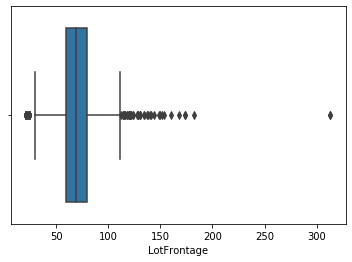

In [10]:
sns.boxplot(df_housing['LotFrontage'])
plt.show()

In [11]:
df_housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
# imputing with median
df_housing['LotFrontage'] = df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())

#### Imputing MasVnrType

In [13]:
round(df_housing['MasVnrType'].value_counts(normalize=True) * 100, 2)

None       59.50
BrkFace    30.65
Stone       8.82
BrkCmn      1.03
Name: MasVnrType, dtype: float64

In [14]:
df_housing['MasVnrType'] = df_housing['MasVnrType'].fillna(df_housing['MasVnrType'].mode()[0])

#### Imputing MasVnrArea

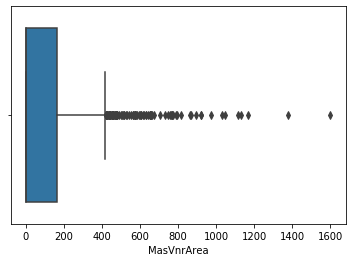

In [15]:
sns.boxplot(df_housing['MasVnrArea'])
plt.show()

In [16]:
df_housing.loc[df_housing['MasVnrArea'].isna(), ['MasVnrType', 'MasVnrArea']].head(100)

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


All these has MasVnrType None so let's set MasVnrArea to 0

In [17]:
df_housing['MasVnrArea'] = df_housing['MasVnrArea'].fillna(0)

#### Imputing Electrical

In [18]:
df_housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
df_housing['Electrical'].fillna(df_housing['Electrical'].mode()[0], inplace = True)

In [20]:
# remaining null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

Series([], dtype: float64)

#### Check If sale is normally distributed

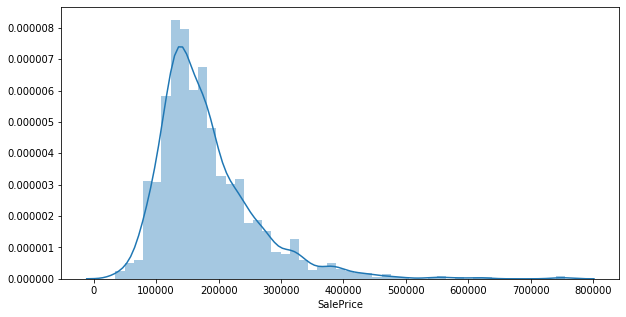

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Log Transformation

In [22]:
df_housing['SalePrice'] = np.log(df_housing['SalePrice'])

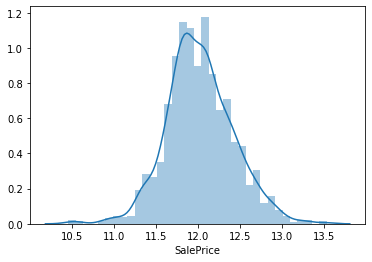

In [23]:
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Drop highly skewed categorical columns

In [24]:
cat_columns = df_housing.select_dtypes('object').columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSSubClass:
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64
-------------
MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Street:
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
Utilities:
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dt

In [26]:
skewed_cols = []
for col in cat_columns:
    per_count = 100 * df_housing[col].value_counts(normalize=True)
    print(per_count)
    if per_count.iloc[0] >= 99:
        skewed_cols.append(col)
print(skewed_cols)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
No Alley    93.767123
Grvl         3.424658
Pave         2.808219
Name: Alley, dtype: float64
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
Gtl    

Name: PoolQC, dtype: float64
No Fence    80.753425
MnPrv       10.753425
GdPrv        4.041096
GdWo         3.698630
MnWw         0.753425
Name: Fence, dtype: float64
None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64
WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64
Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64
['Street', 'Utilities', 'PoolQC']


In [27]:
df_housing = df_housing.drop(skewed_cols, axis=1)

#### Merge low percentage categories

In [28]:
cat_columns = df_housing.select_dtypes('object').columns
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSSubClass:
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64
-------------
MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64
-------------
LandSlope:
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
-------------
Neighborhood:
NAmes      15.41
CollgCr    10.

In [29]:
def replace_with_others(col, per):
    temp = round(100 * df_housing[col].value_counts(normalize=True), 2)
    temp = temp[temp < per]
    df_housing[col] = df_housing[col].apply(lambda x : 'Others' if x in temp.index else x)

In [30]:
replace_with_others('Alley', 5)
replace_with_others('LotShape', 5)
replace_with_others('LotConfig', 5)
replace_with_others('LandSlope', 5)
replace_with_others('Neighborhood', 2)
replace_with_others('Condition1', 5)
replace_with_others('Condition2', 1)
replace_with_others('BldgType', 5)
replace_with_others('HouseStyle', 3)
replace_with_others('RoofStyle', 5)
replace_with_others('RoofMatl', 5)
replace_with_others('Exterior1st', 1)
replace_with_others('Exterior2nd', 1)
replace_with_others('MasVnrType', 10)
replace_with_others('ExterCond', 5)
replace_with_others('Foundation', 5)
replace_with_others('Heating', 5)
replace_with_others('HeatingQC', 5)
replace_with_others('Electrical', 5)
replace_with_others('Functional', 5)
replace_with_others('FireplaceQu', 5)
replace_with_others('MiscFeature', 5)
replace_with_others('SaleType', 5)
replace_with_others('SaleCondition', 5)
replace_with_others('BsmtQual', 5)
replace_with_others('BsmtCond', 5)
replace_with_others('BsmtFinType1', 7)
replace_with_others('BsmtFinType2', 5)
replace_with_others('GarageQual', 6)
replace_with_others('GarageCond', 6)
replace_with_others('LandContour', 5)

#### Converting Year columns to Age Column

In [31]:
from datetime import date

In [32]:
cur_year = int(date.today().year)
df_housing['GarageAge'] = df_housing['GarageYrBlt'].apply(lambda x : x if x == 'No Garage' else cur_year - int(x))
df_housing['BuildAge'] = df_housing['YearBuilt'].apply(lambda x :cur_year - int(x))
df_housing['RemodelAge'] = df_housing['YearRemodAdd'].apply(lambda x :cur_year - int(x))
df_housing['SoldAge'] = df_housing['YrSold'].apply(lambda x :cur_year - int(x))
df_housing = df_housing.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)
df_housing.loc[:,['GarageAge', 'BuildAge', 'RemodelAge', 'SoldAge']].head()

,GarageAge,BuildAge,RemodelAge,SoldAge
0,17,17,17,12
1,44,44,44,13
2,19,19,18,12
3,22,105,50,14
4,20,20,20,12


#### Creating Dummies

In [33]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
ExterCond        146

In [34]:
cat_cols = df_housing.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'GarageAge'],
      dtype='object')

In [35]:
col_with_others = ['Alley', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 
                   'Foundation', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'MiscFeature', 
                   'SaleType', 'SaleCondition','BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2', 'GarageQual', 
                   'GarageCond', 'LandContour']

In [36]:
# creating dummies for variables for which we previously merge catgeories as 'Others'
# and droping the Others instead of drop first to make better understandable from business prespective
for col in col_with_others:
    dummies = pd.get_dummies(df_housing[col], prefix=col)
    dummies.drop(f'{col}_Others', axis=1, inplace=True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SalePrice,GarageAge,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,...,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Heating_GasA,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_SBrkr,Functional_Typ,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,GarageQual_TA,GarageCond_TA,LandContour_Lvl
0,60,RL,65.0,8450,7,5,196.0,Gd,No,706,0,150,856,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,Y,0,61,0,0,0,0,No Fence,0,2,12.247694,17,17,17,12,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1
1,20,RL,80.0,9600,6,8,0.0,TA,Gd,978,0,284,1262,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,Y,298,0,0,0,0,0,No Fence,0,5,12.109011,44,44,44,13,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,1
2,60,RL,68.0,11250,7,5,162.0,Gd,Mn,486,0,434,920,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,Y,0,42,0,0,0,0,No Fence,0,9,12.317167,19,19,18,12,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1
3,70,RL,60.0,9550,7,5,0.0,TA,No,216,0,540,756,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,Y,0,35,272,0,0,0,No Fence,0,2,11.849398,22,105,50,14,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1
4,60,RL,84.0,14260,8,5,350.0,Gd,Av,655,0,490,1145,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,Y,192,84,0,0,0,0,No Fence,0,12,12.429216,20,20,20,12,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1


In [37]:
rem_cat_cols = cat_cols.drop(col_with_others)
rem_cat_cols

Index(['MSSubClass', 'MSZoning', 'ExterQual', 'BsmtExposure', 'CentralAir',
       'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
       'GarageAge'],
      dtype='object')

In [38]:
for col in rem_cat_cols:
    dummies = pd.get_dummies(df_housing[col], prefix=col, drop_first = True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,...,GarageAge_58,GarageAge_59,GarageAge_60,GarageAge_61,GarageAge_62,GarageAge_63,GarageAge_64,GarageAge_65,GarageAge_66,GarageAge_67,GarageAge_68,GarageAge_69,GarageAge_70,GarageAge_71,GarageAge_72,GarageAge_73,GarageAge_74,GarageAge_75,GarageAge_78,GarageAge_79,GarageAge_80,GarageAge_81,GarageAge_82,GarageAge_83,GarageAge_84,GarageAge_85,GarageAge_86,GarageAge_87,GarageAge_88,GarageAge_89,GarageAge_90,GarageAge_91,GarageAge_92,GarageAge_93,GarageAge_94,GarageAge_95,GarageAge_96,GarageAge_97,GarageAge_98,GarageAge_99,GarageAge_100,GarageAge_102,GarageAge_104,GarageAge_105,GarageAge_106,GarageAge_110,GarageAge_112,GarageAge_114,GarageAge_120,GarageAge_No Garage
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,44,44,13,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,19,18,12,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,105,50,14,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,20,20,12,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train-Test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_housing.drop('SalePrice', axis=1)
X.head(1)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,...,GarageAge_58,GarageAge_59,GarageAge_60,GarageAge_61,GarageAge_62,GarageAge_63,GarageAge_64,GarageAge_65,GarageAge_66,GarageAge_67,GarageAge_68,GarageAge_69,GarageAge_70,GarageAge_71,GarageAge_72,GarageAge_73,GarageAge_74,GarageAge_75,GarageAge_78,GarageAge_79,GarageAge_80,GarageAge_81,GarageAge_82,GarageAge_83,GarageAge_84,GarageAge_85,GarageAge_86,GarageAge_87,GarageAge_88,GarageAge_89,GarageAge_90,GarageAge_91,GarageAge_92,GarageAge_93,GarageAge_94,GarageAge_95,GarageAge_96,GarageAge_97,GarageAge_98,GarageAge_99,GarageAge_100,GarageAge_102,GarageAge_104,GarageAge_105,GarageAge_106,GarageAge_110,GarageAge_112,GarageAge_114,GarageAge_120,GarageAge_No Garage
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df_housing['SalePrice']
y.head(1)

0    12.247694
Name: SalePrice, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = columns

## RFE

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [46]:
X_train.shape

(1021, 266)

In [47]:
y_train.shape

(1021,)

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(lin_reg, 20)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 33),
 ('LotArea', False, 17),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 129),
 ('BsmtFinSF1', False, 21),
 ('BsmtFinSF2', False, 29),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', False, 26),
 ('1stFlrSF', False, 11),
 ('2ndFlrSF', False, 22),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 191),
 ('FullBath', False, 9),
 ('HalfBath', False, 8),
 ('BedroomAbvGr', False, 108),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 131),
 ('GarageCars', True, 1),
 ('GarageArea', False, 221),
 ('WoodDeckSF', False, 43),
 ('OpenPorchSF', False, 245),
 ('EnclosedPorch', False, 51),
 ('3SsnPorch', False, 73),
 ('ScreenPorch', False, 31),
 ('PoolArea', False, 98),
 ('MiscVal', False, 232),
 ('MoSold', False, 81),
 ('BuildAge', True, 1),
 ('RemodelAge', False, 30),
 ('SoldAge', False, 124),
 ('Alley_No Alley', False, 63),
 ('LotShape_IR1', False, 229),
 (

In [50]:
cols = rfe.support_
X_train.columns[cols]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'BuildAge',
       'Neighborhood_Edwards', 'Condition1_Norm', 'HeatingQC_Ex',
       'FireplaceQu_No Fireplace', 'BsmtQual_Ex', 'MSSubClass_60',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'BsmtExposure_Gd'],
      dtype='object')

### Correlations


In [51]:
X_train = X_train.loc[:,cols]

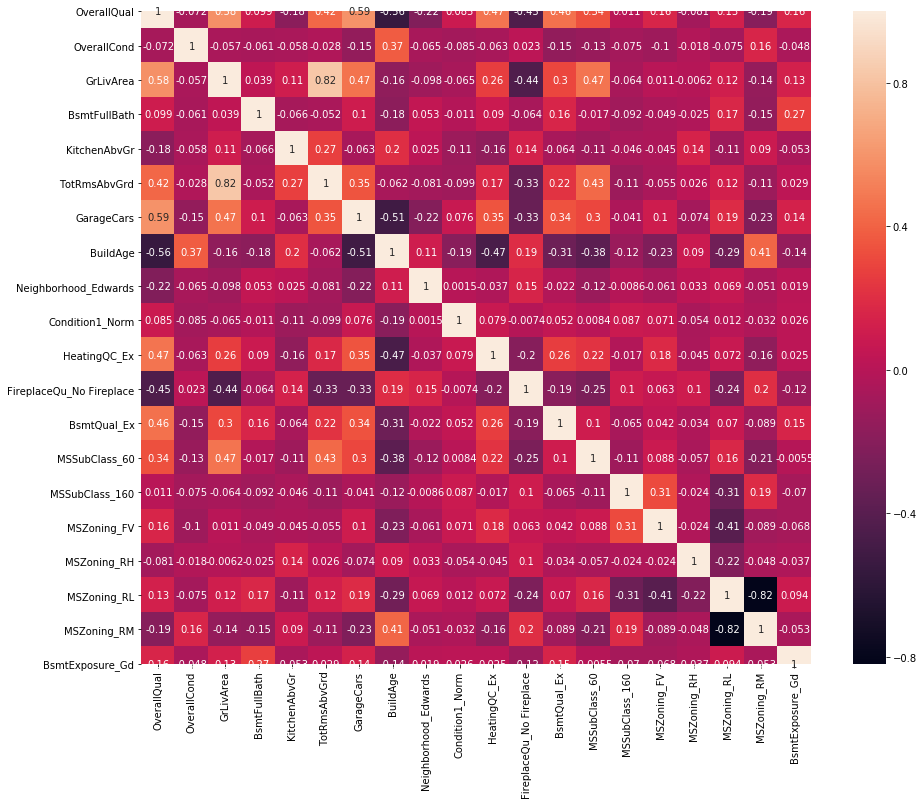

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Model Building

### Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [59]:
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso, param_grid=params, 
                        scoring='neg_mean_absolute_error', cv=5,
                        return_train_score=True, verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035250,0.060506,0.001401,0.000485,0.0001,{'alpha': 0.0001},-0.093430,-0.117777,-0.104633,-0.090885,-0.089192,-0.099178,0.010741,2,-0.096800,-0.085217,-0.095187,-0.096906,-0.097641,-0.094350,0.004636
1,0.002402,0.000491,0.000600,0.000490,0.001,{'alpha': 0.001},-0.092470,-0.116702,-0.104757,-0.091840,-0.089481,-0.099043,0.010303,1,-0.097002,-0.085500,-0.095315,-0.097010,-0.097772,-0.094520,0.004581
2,0.002002,0.000633,0.001202,0.000406,0.01,{'alpha': 0.01},-0.098882,-0.118911,-0.107741,-0.099539,-0.091758,-0.103362,0.009273,3,-0.101353,-0.091655,-0.100035,-0.102211,-0.102692,-0.099589,0.004069
3,0.002201,0.000750,0.001201,0.000401,0.05,{'alpha': 0.05},-0.126804,-0.145530,-0.149333,-0.130118,-0.120367,-0.134423,0.011131,4,-0.134460,-0.122008,-0.134193,-0.132945,-0.134874,-0.131696,0.004887
4,0.001801,0.000749,0.001001,0.000633,0.1,{'alpha': 0.1},-0.160621,-0.169729,-0.191361,-0.161107,-0.151051,-0.166768,0.013636,5,-0.170453,-0.155912,-0.165749,-0.166196,-0.169257,-0.165513,0.005121
